# Development of regression model to predict car prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import pickle
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size ch

In [2]:
df_cars_raw = pd.read_csv('cars.csv',sep=';',index_col=0)

In [53]:
df_cars.columns

Index(['Biltyp', 'Bränsle', 'CO2-utsläpp', 'Drivhjul', 'Färg', 'Hästkrafter',
       'I trafik', 'Miltal', 'Modell', 'Modellår', 'Märke', 'Tillverkningsår',
       'Växellåda', 'header', 'href', 'place', 'price', 'car type',
       'predicted price', 'price rating'],
      dtype='object')

In [77]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">href</a>'.format(val)

def df_with_href(df):
    return df.style.format({'href': make_clickable})

def df_pretty(df):
    columns = ['header', 'href', 'place', 'price','predicted price', 'price rating',
               'Miltal','Modellår','Tillverkningsår']
    return df_with_href(df = df[columns])

In [4]:
df_cars_raw.describe()

,Hästkrafter,Miltal,Modellår,Tillverkningsår,price
count,621.000000,672.000000,672.000000,672.000000,672.000000
mean,90.447665,8993.298363,2012.480655,2012.223214,95037.130952
std,13.018817,8285.606361,4.951290,4.913335,62035.070707
min,47.000000,0.000000,1997.000000,1997.000000,2500.000000
25%,74.000000,613.000000,2010.000000,2010.000000,44900.000000
50%,89.000000,7752.250000,2013.000000,2013.000000,88250.000000
75%,99.000000,14685.000000,2017.000000,2016.000000,150000.000000
max,149.000000,77123.000000,2018.000000,2018.000000,419000.000000


In [57]:
index = ((df_cars_raw['Miltal'] < 50000) & 
         (df_cars_raw['Miltal'] > 1000) & 
         (df_cars_raw['price'] > 4000))
df_cars = df_cars_raw.loc[index].copy()

In [58]:
df_cars.describe()

,Hästkrafter,Miltal,Modellår,Tillverkningsår,price
count,466.000000,487.000000,487.000000,487.000000,487.000000
mean,89.660944,11833.992813,2010.792608,2010.511294,69587.942505
std,13.327345,6665.280930,4.288479,4.204565,44358.942115
min,59.000000,1100.000000,1997.000000,1997.000000,4125.000000
25%,74.000000,6508.000000,2008.000000,2008.000000,34900.000000
50%,89.000000,10950.000000,2012.000000,2012.000000,64900.000000
75%,99.000000,16249.500000,2014.000000,2014.000000,99000.000000
max,149.000000,32499.500000,2018.000000,2017.000000,279000.000000


/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


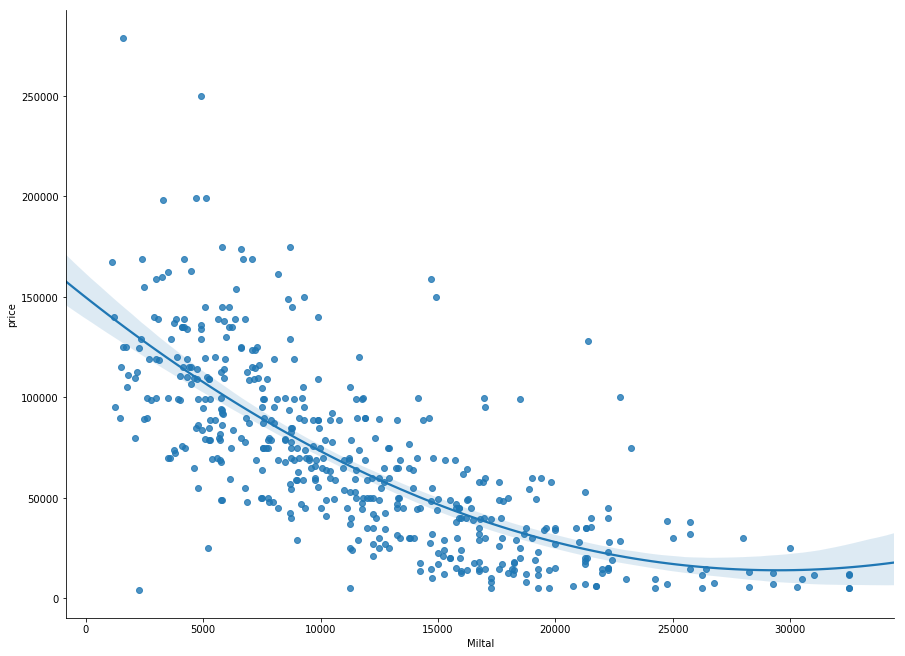

In [59]:
a = sns.lmplot(x="Miltal", y="price", data=df_cars,order=2)
a.fig.set_size_inches(15,10)

In [60]:
linear_regression = LinearRegression()

In [61]:
y = df_cars['price']
#feature_colums = ['Miltal','Modellår','Tillverkningsår','Hästkrafter']
feature_colums = ['Miltal','Modellår','Tillverkningsår']
X = df_cars[feature_colums]
X.dropna(axis = 1,inplace = True)

/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


/Users/martinalexandersson/Dev/blocket/venv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


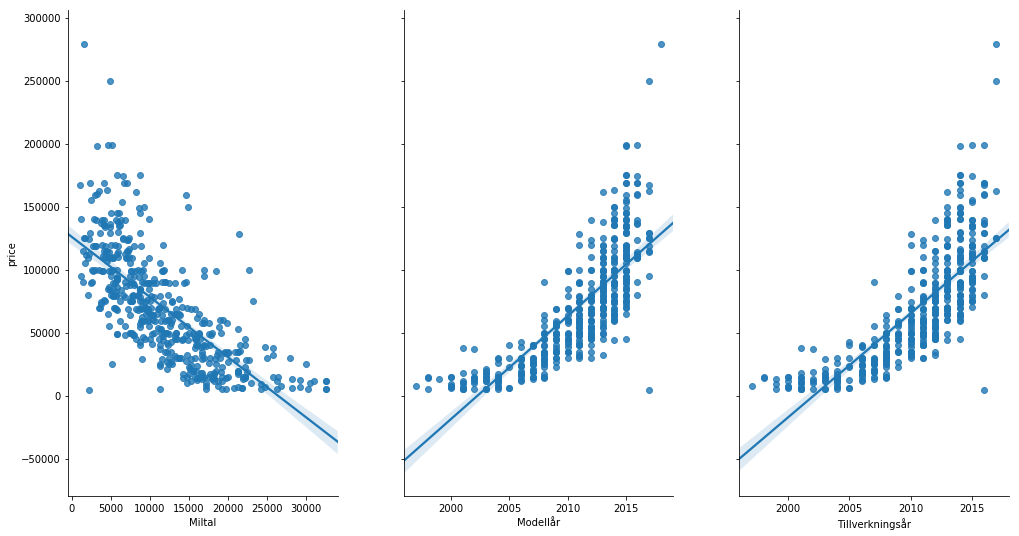

In [62]:
a = sns.pairplot(data = df_cars,x_vars = feature_colums,y_vars=['price'],kind = 'reg',)
a.fig.set_size_inches(15,10)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [64]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), linear_regression)

r2s = []
for i in range(20):

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    r2s.append(r2)
np.mean(r2s)

0.7013742138658686

In [65]:
model.fit(X, y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [66]:
pickle.dump(model, open('model.pkl', 'wb'))

In [67]:
df_cars['predicted price'] = model.predict(df_cars[feature_colums])
df_cars['price rating'] = df_cars['price'] / df_cars['predicted price']

In [68]:
df_with_href(df_cars.sort_values(by = 'price rating'))

,Biltyp,Bränsle,CO2-utsläpp,Drivhjul,Färg,Hästkrafter,I trafik,Miltal,Modell,Modellår,Märke,Tillverkningsår,Växellåda,header,href,place,price,car type,predicted price,price rating
80733755,Yrkesfordon,Diesel,119 g/km,Fyrhjulsdriven,Vit,99,2017-01-13,2249.5,DANGEL BERLINGO 4X4,2017,Citroën,2016,Manuell,Citroën Berlingo 4X4 dangel -17,href,Östergötland,4125,berlingo,150174,0.0274681
80426876,Kombi,Bensin,177 g/km,Tvåhjulsdriven,Blå,108,2004-02-27,11249.5,BERLINGO FA 1.6,2004,Citroën,2004,Manuell,Citroën Berlingo Family -04,href,Västernorrland,5000,berlingo,23893,0.209266
80218093,Kombi,Bensin,177 g/km,Tvåhjulsdriven,Ljusbrun,108,2005-10-07,21749.5,BERLINGO FA 1.6I,2005,Citroën,2005,Manuell,"Citroen Berlingo Fa 1,6 -05",href,Gävleborg,6000,berlingo,15753.5,0.380867
80428975,-,Diesel,152 g/km,Tvåhjulsdriven,Ljusblå,89,2006-02-22,21749.5,BERLINGO FA HDI,2005,Citroën,2005,Manuell,Citroen Berlingo hdi -05,href,Kronoberg,6000,berlingo,15753.5,0.380867
80603592,-,Bensin,-,Tvåhjulsdriven,Silver,108,2001-07-10,32499.5,BERLINGO FA 1.6,2001,Citroën,2001,Manuell,Citroën Berlingo fa 1.6 -01,href,Båstad,5000,berlingo,12946.6,0.386202
80818452,-,Diesel,-,Tvåhjulsdriven,Mörkblå,69,2001-09-28,32499.5,BERLINGO SK 1.9D,2001,Citroën,2001,Manuell,"Citroen Berlingo 1,9 Diesel -01",href,Hässleholm,5000,berlingo,12946.6,0.386202
80950500,-,Bensin,-,Tvåhjulsdriven,Silver,108,2003-03-19,19749.5,BERLINGO FA 1.6,2003,Citroën,2003,Manuell,"Citroën Berlingo family 1,6 bensin -03",href,Stockholm,5000,berlingo,12155.7,0.411329
80907805,Yrkesfordon,Diesel,129 g/km,Tvåhjulsdriven,Vit,89,2012-12-12,14749.5,7 BERLINGO,2013,Citroën,2012,Manuell,"Berlingo 1,6 e-hdi låg skatt 2041 kr/år 2 äga -13",href,Stockholm,32000,berlingo,75106.3,0.426063
80457209,Yrkesfordon,Diesel,143 g/km,Tvåhjulsdriven,Vit,74,2007-11-01,15749.5,BERLINGO 75 HDI,2008,Citroën,2008,Manuell,Citroen Berlingo 75 HDI -08,href,Stockholm,15000,berlingo,33910.7,0.442338
80924239,Yrkesfordon,Diesel,151 g/km,Tvåhjulsdriven,Silver,89,2011-09-01,13749.5,7 BERLINGO,2012,Citroën,2011,Manuell,Citroen Berlingo -12,href,Stockholm,30000,berlingo,67798.7,0.442487


In [69]:
index = df_cars['header'] == 'Renault Kangoo 1,5 (6 växlad) -08'
df_cars.loc[index]

,Biltyp,Bränsle,CO2-utsläpp,Drivhjul,Färg,Hästkrafter,I trafik,Miltal,Modell,Modellår,Märke,Tillverkningsår,Växellåda,header,href,place,price,car type,predicted price,price rating
80790572,Kombi,Diesel,151 g/km,Tvåhjulsdriven,Vit,103.0,2008-11-14,15749.5,W KANGOO,2008.0,Renault,2008.0,Manuell,"Renault Kangoo 1,5 (6 växlad) -08",https://www.blocket.se/goteborg/Renault_Kangoo...,Göteborg,45000.0,kangoo,33910.721655,1.327014


In [70]:
df_cars['car type'].unique()

array(['berlingo', 'caddy', 'kangoo'], dtype=object)

In [71]:
degree = 2
kangoo_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
index = df_cars['car type'] == 'kangoo'
df_kangoo = df_cars.loc[index].copy()

r2s = []
for i in range(20):

    kangoo_model.fit(X_train, y_train)
    y_predict = kangoo_model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    r2s.append(r2)
np.mean(r2s)


0.7013742138658686

In [72]:
kangoo_model.fit(df_kangoo[feature_colums],df_kangoo['price'])

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [73]:
df_kangoo['predicted price'] = model.predict(df_kangoo[feature_colums])
df_kangoo['price rating'] = df_kangoo['price'] / df_kangoo['predicted price']
df_with_href(df_kangoo.sort_values(by = 'price rating'))

,Biltyp,Bränsle,CO2-utsläpp,Drivhjul,Färg,Hästkrafter,I trafik,Miltal,Modell,Modellår,Märke,Tillverkningsår,Växellåda,header,href,place,price,car type,predicted price,price rating
80900137,Kombi,Bensin,-,Tvåhjulsdriven,Ljusgrå,95,2006-02-15,14723,KC KANGOO,2006,Renault,2006,Manuell,Renault Kangoo 1.6 95hk -06,href,Älvsborg,14800,kangoo,25660.4,0.576763
80783111,Kombi,Bensin,177 g/km,Tvåhjulsdriven,Vit,74,2000-05-11,17249.5,KC,2000,Renault,2000,Manuell,"RENAULT Kangoo 1,4 SNABB AFFÄR 8000 KR -00",href,Östergötland,8000,kangoo,11983.8,0.667569
80934421,Kombi,Diesel,-,Tvåhjulsdriven,Ljusgrå,63,2002-03-01,32499.5,KANGOO FCOJBF,2003,Renault,2002,Manuell,Renault kangoo -03,href,Halland,11500,kangoo,15407.5,0.746391
77656999,Kombi,Diesel,137 g/km,Tvåhjulsdriven,Silver,85,2009-03-09,12000,KANGOO,2009,Renault,2009,Manuell,Renault Kangoo 1.5 DCI Skåp / Nybesiktigad -09,href,Södermanland,34900,kangoo,45654.1,0.764444
80942790,Kombi,Bensin,170 g/km,Tvåhjulsdriven,Vit,106,2011-12-28,6160,W KANGOO,2011,Renault,2011,Manuell,Renault Kangoo -11,href,Stockholm,59375,kangoo,72832.8,0.815223
80696920,Kombi,El,-,Tvåhjulsdriven,Vit,59,2012-12-28,1441,FW KANGOO EXPRESS Z.E,2013,Renault,2013,Automat,Renault Kangoo Express Maxi II Z.E. Aut -13,href,Kristianstad,89900,kangoo,104301,0.861929
79745147,Kombi,Diesel,-,Tvåhjulsdriven,Vit,108,2012-11-29,8998,W KANGOO,2013,Renault,2012,Manuell,Renault Kangoo II 1.5 dCi FAP (110hk) Style 5 -13,href,Uppsala,74900,kangoo,86476.6,0.86613
80603429,Kombi,Bensin,-,Tvåhjulsdriven,Blå,106,2008-12-11,6800,W KANGOO,2009,Renault,2008,Manuell,Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09,href,Göteborg,54900,kangoo,58811,0.933499
80865099,Kombi,Bensin,-,Tvåhjulsdriven,Blå,74,1998-07-31,16249.5,KC - KANGOO,1998,Renault,1998,Manuell,Renault kangoo . ny motor -98,href,Piteå,14000,kangoo,14979.9,0.934587
80896861,Kombi,Diesel,119 g/km,Tvåhjulsdriven,Vit (Mineralvit Qng),89,2014-05-27,2100,W KANGOO,2014,Renault,2014,Manuell,Renault Kangoo II Kombi phII dCi 90FAP S/S St -14,href,Dalarna,109500,kangoo,112414,0.974074


In [74]:
index = df_kangoo['header'] == 'Renault Kangoo 1,5 (6 växlad) -08'
df_kangoo.loc[index]

,Biltyp,Bränsle,CO2-utsläpp,Drivhjul,Färg,Hästkrafter,I trafik,Miltal,Modell,Modellår,Märke,Tillverkningsår,Växellåda,header,href,place,price,car type,predicted price,price rating
80790572,Kombi,Diesel,151 g/km,Tvåhjulsdriven,Vit,103.0,2008-11-14,15749.5,W KANGOO,2008.0,Renault,2008.0,Manuell,"Renault Kangoo 1,5 (6 växlad) -08",https://www.blocket.se/goteborg/Renault_Kangoo...,Göteborg,45000.0,kangoo,33910.721655,1.327014


In [75]:
index = df_kangoo['header'] == 'Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09'
df_kangoo.loc[index]



,Biltyp,Bränsle,CO2-utsläpp,Drivhjul,Färg,Hästkrafter,I trafik,Miltal,Modell,Modellår,Märke,Tillverkningsår,Växellåda,header,href,place,price,car type,predicted price,price rating
80603429,Kombi,Bensin,-,Tvåhjulsdriven,Blå,106.0,2008-12-11,6800.0,W KANGOO,2009.0,Renault,2008.0,Manuell,Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09,https://www.blocket.se/goteborg/Renault_Kangoo...,Göteborg,54900.0,kangoo,58810.961338,0.933499


In [91]:
index = ((df_cars['Biltyp'] == 'Kombi') & 
         (df_cars['Miltal'] < 15000) &
         (df_cars['Tillverkningsår'] > 2007) &
         
         (~df_cars['header'].str.contains('Skåp')) & 
         (~df_cars['header'].str.contains('SKÅP')) &
         (~df_cars['header'].str.contains('HDi')) &
         (~df_cars['header'].str.contains('HDI')) &
         (~df_cars['header'].str.contains('Hdi')) &
         
         
         (~df_cars['header'].str.contains('TDI')) &
         
         (~df_cars['header'].str.contains('SÅLD')) 
         
         
         
        
        )
df_selected = df_cars.loc[index]

df_pretty(df_selected.sort_values(by = 'price rating'))

,header,href,place,price,predicted price,price rating,Miltal,Modellår,Tillverkningsår
80942790,Renault Kangoo -11,href,Stockholm,59375,72832.8,0.815223,6160,2011,2011
80115429,VW Caddy -13,href,Södermanland,79000,93053.1,0.848978,5249.5,2013,2013
80696920,Renault Kangoo Express Maxi II Z.E. Aut -13,href,Kristianstad,89900,104301,0.861929,1441,2013,2013
79745147,Renault Kangoo II 1.5 dCi FAP (110hk) Style 5 -13,href,Uppsala,74900,86476.6,0.86613,8998,2013,2012
80603429,Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09,href,Göteborg,54900,58811,0.933499,6800,2009,2008
77183229,Volkswagen Caddy 1.2TSI 86HK BENSIN DRAGKROK -14,href,Helsingborg,89000,94374.4,0.943053,9900,2014,2013
80896861,Renault Kangoo II Kombi phII dCi 90FAP S/S St -14,href,Dalarna,109500,112414,0.974074,2100,2014,2014
80575356,Volkswagen Caddy Eco Gas/bensin 7090mil -11,href,Lund,69000,70135.1,0.983815,7249.5,2011,2011
79615891,Citroen Berlingo Family XTR -13,href,Göteborg,94500,91698.8,1.03055,5749.5,2013,2013
78878166,Renault Kangoo II Kombi 1.5 dCi 110 FAP Style -13,href,Eslöv,99000,93463.5,1.05924,5100,2013,2013
